# Reproducibility Project
## Kimball Hill
---
Source: [Landscape heterogeneity rather than crop diversity mediates bird diversity in agricultural landscapes](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0200438)

Original: [Figure 2](https://journals.plos.org/plosone/article/figure/image?size=large&id=10.1371/journal.pone.0200438.g002)

In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(readxl))
suppressMessages(library(gridExtra))
suppressMessages(library(grid))

download.file("https://ndownloader.figshare.com/files/12561704", "data.xlxs")

feeding_guild = read_xlsx("data.xlxs", sheet = "Richness feeding guild") %>% 
  rename(richness = "species richness", value = "feeding guild") %>% 
  filter(scale == 2000) %>% 
  mutate(experiment = "Feeding Guild") %>% 
  select(experiment, value, LandHet, richness)

conservation_status = read_xlsx("data.xlxs", sheet = "Richness conservation status") %>% 
  rename(richness = "species richness", value = "conservation status") %>% 
  filter(scale == 250) %>% 
  mutate(experiment = "Conservation status") %>% 
  select(experiment, value, LandHet, richness)

habitat_preference = read_xlsx("data.xlxs", sheet = "Richness habitat preference") %>% 
  rename(richness = "species richness", value = "habitat preference") %>% 
  filter(scale == 1000) %>% 
  mutate(experiment = "Habitat Preference") %>% 
  select(experiment, value, LandHet, richness)

nesting_behaviour = read_xlsx("data.xlxs", sheet = "Richness nesting behviour") %>% 
  rename(richness = "species richness", value = "nesting behaviour") %>% 
  filter(scale == 250) %>% 
  mutate(experiment = "Nesting Behaviour") %>% 
  select(experiment, value, LandHet, richness)

data = full_join(feeding_guild, conservation_status)
data = full_join(data, habitat_preference)
data = full_join(data, nesting_behaviour)

Joining, by = c("experiment", "value", "LandHet", "richness")
Joining, by = c("experiment", "value", "LandHet", "richness")
Joining, by = c("experiment", "value", "LandHet", "richness")


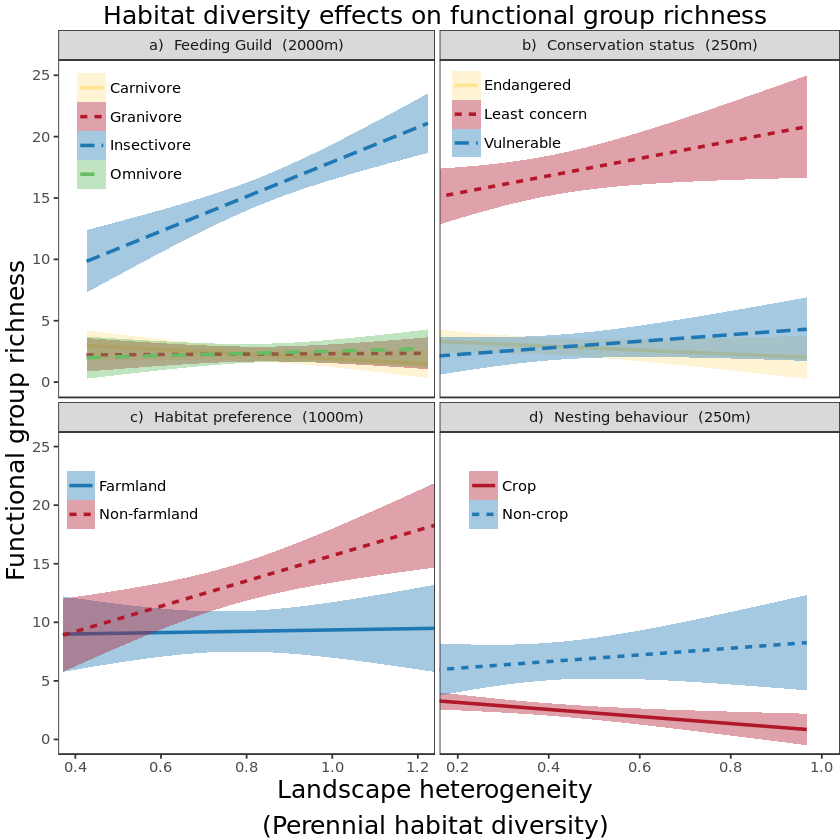

In [3]:
experiments = split(data, f = data$experiment)
legend_keys = c(
  `Conservation status` = 'b)  Conservation status  (250m)',
  `Feeding Guild` = 'a)  Feeding Guild  (2000m)',
  `Habitat Preference` = 'c)  Habitat preference  (1000m)',
  `Nesting Behaviour` = 'd)  Nesting behaviour  (250m)'
)

p = ggplot(data, aes(x = LandHet, y = richness, color = value, linetype = value, fill = value)) +
  geom_smooth(method = "lm") +
  facet_wrap(~experiment, labeller = as_labeller(legend_keys)) +
  theme_bw() +
  theme(legend.position = c(0.2,0.8), legend.title = element_blank(), legend.background = element_blank(),
        axis.title = element_blank(), panel.grid = element_blank(),
        plot.margin = unit(c(0,0,0,0), units = rep("points", 4)))

blue = "#1f78b4"
red = "#b2182b"
green = "#66bd63"
yellow = "#fee391"
p1 = p %+% experiments$`Feeding Guild` + 
  coord_cartesian(xlim = c(0.4, 1.2), ylim = c(0, 25)) +
  theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
  scale_color_manual(values=c(yellow, red, blue, green)) +
  scale_fill_manual(values=c(yellow, red, blue, green))
p2 = p %+% experiments$`Conservation status` + 
  coord_cartesian(xlim = c(0.2, 1.0), ylim = c(0, 25)) + 
  theme(axis.text = element_blank(), axis.ticks = element_blank(), legend.position = c(0.2,0.85)) +
  scale_color_manual(values=c(yellow, red, blue)) +
  scale_fill_manual(values=c(yellow, red, blue))
p3 = p %+% experiments$`Habitat Preference` + 
  coord_cartesian(xlim = c(0.4, 1.2), ylim = c(0, 25)) +
  scale_color_manual(values=c(blue, red)) +
  scale_fill_manual(values=c(blue, red))
p4 = p %+% experiments$`Nesting Behaviour` + 
  coord_cartesian(xlim = c(0.2, 1.0), ylim = c(0, 25)) + 
  theme(axis.text.y = element_blank(), axis.ticks.y = element_blank()) +
  scale_color_manual(values=c(red, blue)) +
  scale_fill_manual(values=c(red, blue))
final_fig = grid.arrange(p1, p2, p3, p4,
                         top = textGrob("Habitat diversity effects on functional group richness", gp=gpar(fontsize = 15, font = 8)), 
                         bottom = textGrob("Landscape heterogeneity\n(Perennial habitat diversity)", gp=gpar(fontsize = 15, font = 8)),
                         left = textGrob("Functional group richness", gp=gpar(fontsize = 15, font = 8), rot = 90))

In [ ]:
ggsave("figure_2.png", final_fig)